In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
sns.set()

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [4]:
display('Training Data',train_data.head(10))

'Training Data'

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Text(0.5, 0, 'Date')

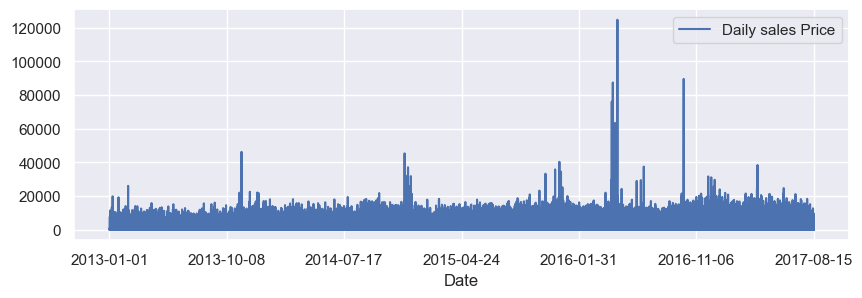

In [7]:
train_data.plot(x='date',y='sales',figsize=(10,3),label='Daily sales Price')
plt.xlabel('Date')

In [8]:
from sklearn.preprocessing import LabelEncoder
def encode(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [9]:
train_data = train_data.apply(lambda x : encode(x))
test_data = test_data.apply(lambda x : encode(x))
display(train_data.sample(5))
display(test_data.sample(5))

,id,date,store_nbr,family,sales,onpromotion
797864,797864,447,45,23,6.000,0
536547,536547,301,14,0,4.000,0
400353,400353,224,41,30,2.000,0
395501,395501,221,6,29,169.545,0
909516,909516,510,29,3,0.000,0


,id,date,store_nbr,family,onpromotion
24721,3025609,13,52,4,0
9555,3010443,5,27,18,7
16507,3017395,9,22,7,14
18157,3019045,10,19,7,17
14660,3015548,8,20,8,8


In [10]:
train_inputs  = train_data.drop(['sales'], axis = 1)
train_targets = train_data['sales']

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_ips, train_val, target_ips, target_val = train_test_split(train_inputs, train_targets, test_size = 0.2, random_state = 28)

In [12]:
XGB = XGBRegressor(n_estimators=100, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state = 42)


In [13]:
XGB.fit(train_ips, target_ips)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
val_pred = XGB.predict(train_val)
mse = mean_squared_error(target_val, val_pred)
r2 = r2_score(target_val, val_pred)
print(f"Mean Squared Error: {mse}")
print(f"R Squared Score", r2)


Mean Squared Error: 489091.38251682377
R Squared Score 0.5931540349405093


In [15]:
predictions = XGB.predict(test_data)